In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
matplotlib.__version__

'3.3.2'

In [3]:
# This option ensures the charts I create are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

In [4]:
# Define path
path = r'C:\Users\Bella\Desktop\Data Analytics\Achievment 6'

In [5]:
# Import data
df_covid = pd.read_csv(os.path.join(path,'us_counties_covid.csv'), index_col = False)

## Data Cleaning

In [6]:
df_covid.shape

(797191, 6)

In [7]:
df_covid.columns

Index(['Date', 'County', 'State', 'Fips', 'Cases', 'Deaths'], dtype='object')

In [8]:
# Rename columns
df_covid.rename(columns = {'Fips':'County_id' }, inplace = True)

In [9]:
df_covid.dtypes

Date          object
County        object
State         object
County_id     object
Cases          int64
Deaths       float64
dtype: object

In [10]:
df_covid.head()

,Date,County,State,County_id,Cases,Deaths
0,1/21/2020,Snohomish,Washington,53061,1,0.0
1,1/22/2020,Snohomish,Washington,53061,1,0.0
2,1/23/2020,Snohomish,Washington,53061,1,0.0
3,1/24/2020,Cook,Illinois,17031,1,0.0
4,1/24/2020,Snohomish,Washington,53061,1,0.0


In [11]:
# missing values check
df_covid.isnull().sum()

Date             0
County           0
State            0
County_id      568
Cases            0
Deaths       16655
dtype: int64

In [12]:
# duplicates check
df_dups = df_covid[df_covid.duplicated()]

In [13]:
df_dups.shape # No duplicatess!

(0, 6)

## Mixed-Type Data:

In [14]:
for col in df_covid.columns.tolist():
      weird = (df_covid[[col]].applymap(type) != df_covid[[col]].iloc[0].apply(type)).any(axis = 1)
      if len (df_covid[weird]) > 0:
        print (col)

County_id


## Exploring Relationships

In [15]:
# Create a correlation matrix using pandas

df_covid.corr()

,Cases,Deaths
Cases,1.000000,0.779178
Deaths,0.779178,1.000000


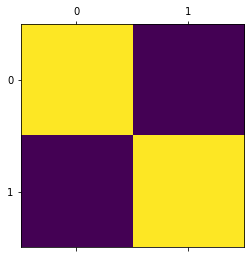

In [16]:
# Create a correlation heatmap using matplotlib

plt.matshow(df_covid.corr())
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

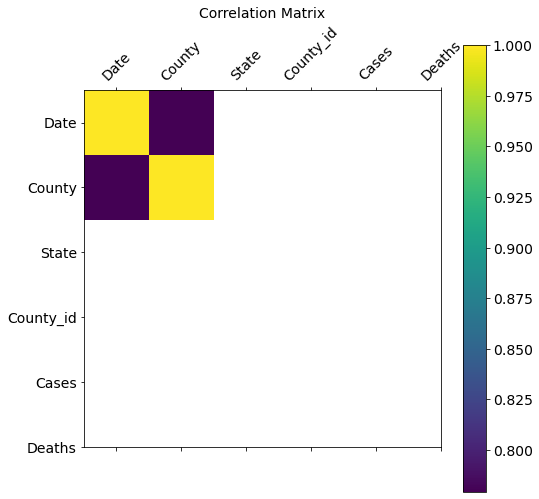

In [17]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(df_covid.corr(), fignum=f.number) # type of plot
plt.xticks(range(df_covid.shape[1]), df_covid.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(df_covid.shape[1]), df_covid.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

## Create a correlation heatmap using seaborn:

In [18]:
df_covid.columns

Index(['Date', 'County', 'State', 'County_id', 'Cases', 'Deaths'], dtype='object')

In [19]:
# Create a subset excluding the "Date" column

sub = df_covid[['County', 'State', 'County_id', 'Cases', 'Deaths']]

In [20]:
sub

,County,State,County_id,Cases,Deaths
0,Snohomish,Washington,53061,1,0.0
1,Snohomish,Washington,53061,1,0.0
2,Snohomish,Washington,53061,1,0.0
3,Cook,Illinois,17031,1,0.0
4,Snohomish,Washington,53061,1,0.0
...,...,...,...,...,...
797186,Sweetwater,Wyoming,56037,2077,10.0
797187,Teton,Wyoming,56039,1724,2.0
797188,Uinta,Wyoming,56041,1175,5.0
797189,Washakie,Wyoming,56043,517,8.0


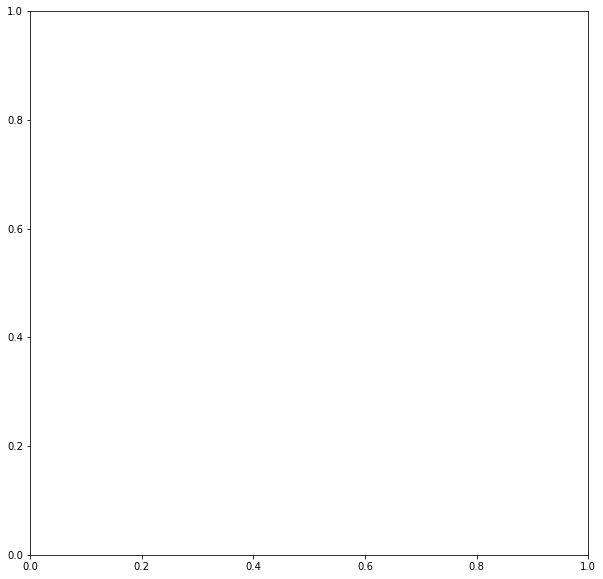

In [21]:
# Create a subplot with matplotlib. What it does is create an empty output, but this is okay—it's just to show the subplots.

f,ax = plt.subplots(figsize=(10,10))

In [22]:
# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.

corr = sns.heatmap(sub.corr(), annot = True, ax = ax) 

# The `annot` argument allows the plot to place the correlation coefficients onto the heatmap.


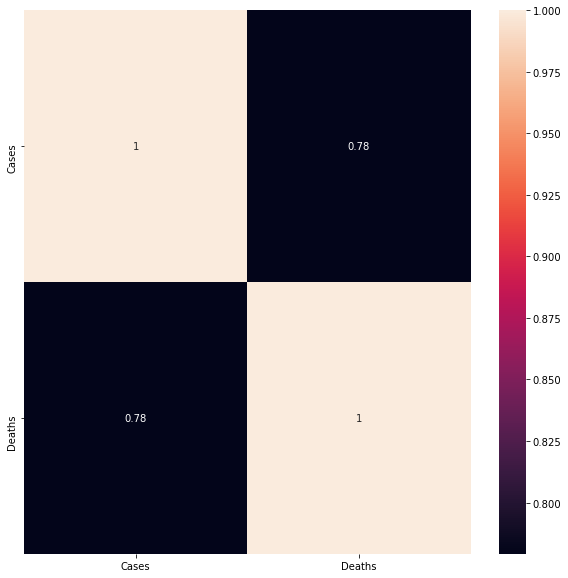

In [23]:
corr.figure

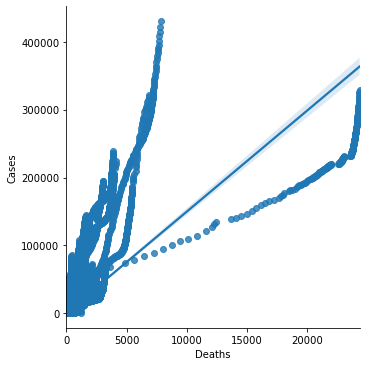

In [24]:
# Create a scatterplot for the "deaths" and "cases" columns in seaborn

sns.lmplot(x = 'Deaths', y = 'Cases', data = df_covid)

## Pair plot

In [25]:
# Create a subset excluding some of the columns

sub = df_covid[['Cases', 'Deaths']]

In [26]:
# Keep only the variables you want to use in the pair plot

sub_2 = sub[['Cases', 'Deaths']]

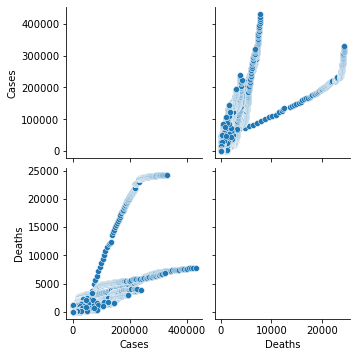

In [27]:
# Create a pair plot 

g = sns.pairplot(sub_2)

#### the pairplot above visualize the aggressive spike of coronavirus cases. I'd like to explore in which states the increase is more accelerated considering number of total population vs number of cases/deaths.

## Categorical Plots:


C:\Users\Bella\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Cases', ylabel='Density'>

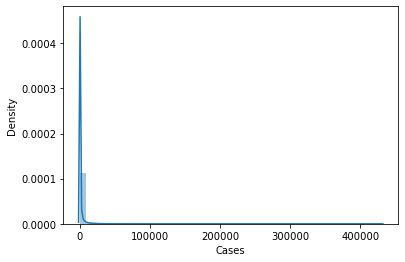

In [28]:
# Use a histogram to visualize the distribution of the variables.
sns.distplot(df_covid['Cases'])

In [29]:
df_covid.loc[df_covid['Cases'] < 5, 'Density'] = 'Low acceleration'

In [30]:
df_covid.loc[(df_covid['Cases'] >= 5) & (df_covid['Cases'] < 10), 'Density'] = 'Middle acceleration'

In [31]:
df_covid.loc[df_covid['Cases'] >= 10, 'Density'] = 'High acceleration'

In [32]:
df_covid['Density'].value_counts(dropna = False)

High acceleration      683325
Low acceleration        70549
Middle acceleration     43317
Name: Density, dtype: int64

In [ ]:
# Create a categorical plot in seaborn using the categories created above

sns.set(style="ticks")
g = sns.catplot(x="Cases", y="Deaths", hue="Density", data=df_covid)

###### Q&A
1. Conduct research on the covid case spread: as you can see from the catplot above the spread speed is high, mostly the case count increases by 10 or more cases daily.
2. More research to conduct: identify most vulnerable states by number of people infected per state vs total population per state.